In [2]:
!pip install pandas matplotlib seaborn numpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv("../data/netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['main_genre'] = df['listed_in'].str.split(',').str[0]

df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [7]:
df.to_csv("../data/cleaned_netflix.csv", index=False)
print("Saved cleaned file!")

Saved cleaned file!


# EDA Visuals

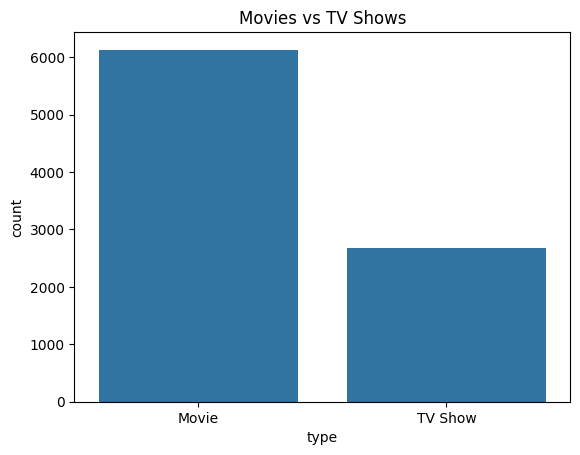

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.show()

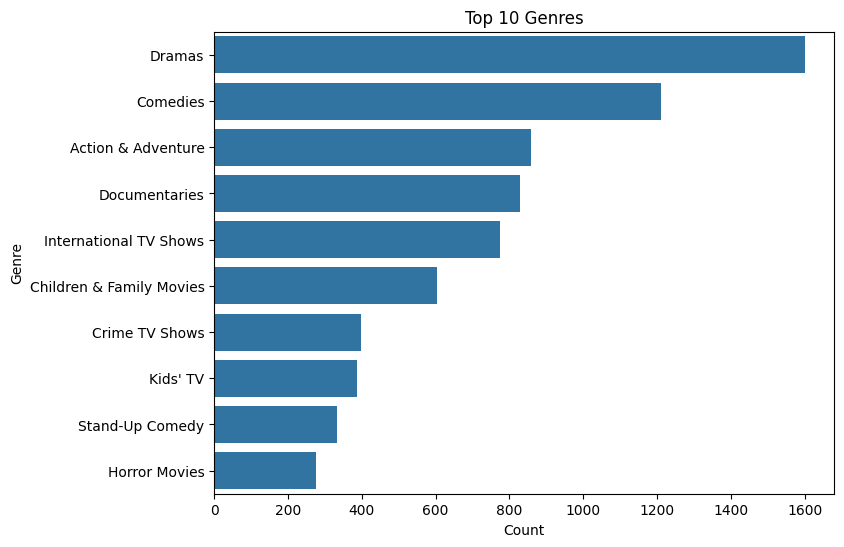

In [15]:
top_genres = df['main_genre'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

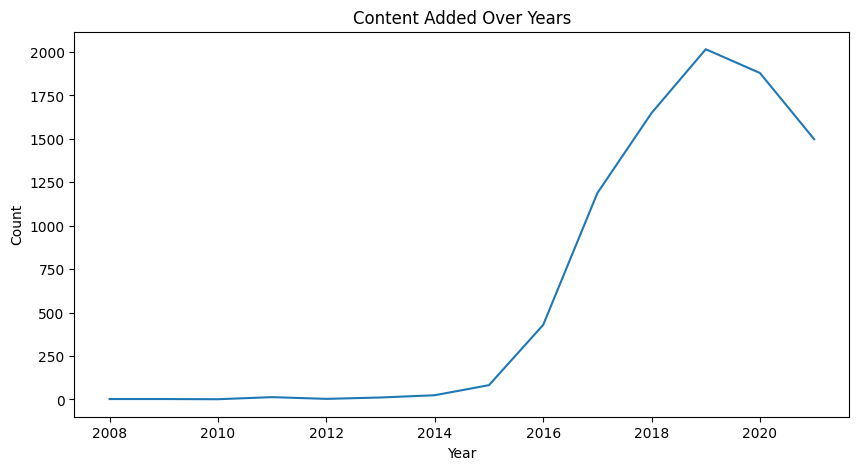

In [16]:
yearly = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly.index, y=yearly.values)
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

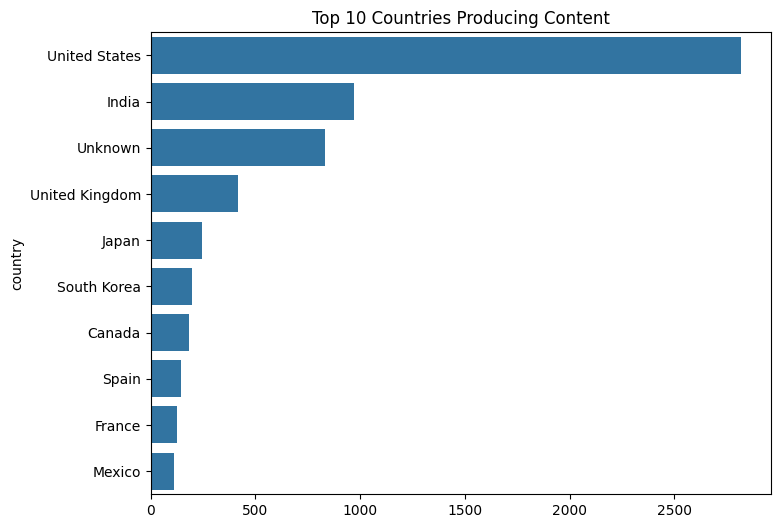

In [17]:
countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=countries.values, y=countries.index)
plt.title("Top 10 Countries Producing Content")
plt.show()